In [ ]:
pip install qiskit

In [ ]:
pip install qutip

In [41]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, Pauli, DensityMatrix
from qiskit.visualization import plot_bloch_vector
from qutip import basis, sigmaz, expect, Bloch
import matplotlib.pyplot as plt
import numpy as np

## Calculo practico de valor esperado

In [27]:
###### CREAR OPERADOR PAULI Z #######
# Crear el operador Z directamente
Z = Operator.from_label('Z')
# Crear el Pauli Z
pZ = Pauli('Z')
# Convertir la base Pauli a su matriz
Z_matrix = pZ.to_matrix()
# Crear un operador desde la matriz
Z = Operator(Z_matrix)
#####################################

qc = QuantumCircuit(1) # Generamos circuito cuántico.
# Inicializar estado (1/sqrt(3) |0> + sqrt(2/3) |1>)
vector = [1/np.sqrt(3),np.sqrt(2/3)]
qc.initialize(vector, 0)
state = Statevector.from_instruction(qc)
expectation_value = state.expectation_value(Z)
print("El valor esperado de Z es:", expectation_value)

El valor esperado de Z es: (-0.3333333333333332+0j)


In [29]:
#### CREAR OPERADOR PAULI X ######
# Crear el operador Z directamente
X = Operator.from_label('X')
# Crear el Pauli X
pX = Pauli('X')
# Convertir la base Pauli a su matriz
X_matrix = pX.to_matrix()
# Crear un operador desde la matriz
X = Operator(X_matrix)
#################################

qc = QuantumCircuit(1)
vector = [1/np.sqrt(3),np.sqrt(2/3)]
qc.initialize(vector, 0)
state = Statevector.from_instruction(qc)
expectation_value = state.expectation_value(X)
print("El valor esperado de X es:", expectation_value)

El valor esperado de X es: (0.9428090415820635+0j)


In [34]:
###### CREAR OPERADOR PAULI Z #######
# Crear el operador Z directamente
Z = Operator.from_label('Z')
# Crear el Pauli Z
pZ = Pauli('Z')
# Convertir la base Pauli a su matriz
Z_matrix = pZ.to_matrix()
# Crear un operador desde la matriz
Z = Operator(Z_matrix)
#####################################

# Crear un circuito para preparar el estado |+>
# |0> --H--> (|0> + |1>)/√2 = |+>
qc = QuantumCircuit(1)
qc.x(0)
#qc.h(0)  # Aplicamos la puerta Hadamard al qubit 0

state = Statevector.from_instruction(qc)
expectation_value = state.expectation_value(Z)
print("El valor esperado de Z es:", expectation_value)

El valor esperado de Z es: (-1+0j)


## Representación geometrica del valor esperado

In [45]:
# Definimos las amplitudes del estado
a = 1/np.sqrt(3)
b = np.sqrt(2)/np.sqrt(3)

# Construimos el estado |psi> = a|0> + b|1>
zero = basis(2, 0)
one = basis(2, 1)
psi = a*zero + b*one

# Definimos el operador Z (Pauli-Z)
Z = sigmaz()
psi_prime = Z * psi  # Aplicamos el operador

# Calcular el valor esperado usando `expect`
val_esperado = expect(Z, psi)
print("Valor esperado de Z con expect:", val_esperado)

# Calcular el valor esperado usando la definición directa:
# <psi|Z|psi> = psi.dag() * Z * psi
val_esperado_directo = psi.dag() * Z * psi
print("Valor esperado de Z usando producto interno:", val_esperado_directo)

Valor esperado de Z con expect: -0.3333333333333334
Valor esperado de Z usando producto interno: (-0.3333333333333334+0j)


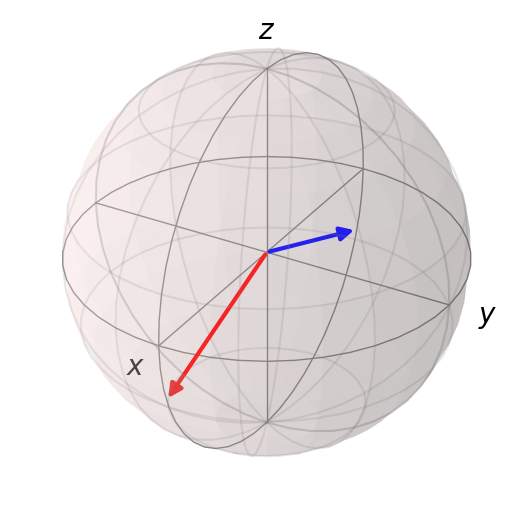

In [44]:
# Creamos una esfera de Bloch
b = Bloch()

# Agregamos el estado inicial
b.add_states(psi)

# Agregamos el estado final tras aplicar Z
b.add_states(psi_prime)

# Opcionalmente, podemos ajustar algunas propiedades del gráfico
b.vector_color = ['r', 'b']  # El primer estado en rojo, el segundo en azul
b.point_marker = ['o']
b.point_color = ['r', 'b']
b.xlabel = ['$x$', '']
b.ylabel = ['$y$', '']
b.zlabel = ['$z$', '']

b.show()